<a href="https://colab.research.google.com/github/OpenCV13/dm/blob/main/module_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 8: Cluster Analysis

The following tutorial contains Python examples for solving classification problems. You should refer to Chapters 7 and 8 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.ipynb.

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


In [515]:
# from google.colab import drive
# drive.mount('/content/drive')

## 8.1 K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [516]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [517]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Cluster ID
user,
john,0
mary,0
bob,0
lisa,1
lee,1
harry,1


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [518]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Jaws,Star Wars,Exorcist,Omen
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments.

In [519]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,0
1,kim,3,2,4,4,1
2,liz,2,3,4,1,0
3,tom,3,2,3,3,1
4,bill,5,4,1,4,0


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rave

Text(0, 0.5, 'SSE')

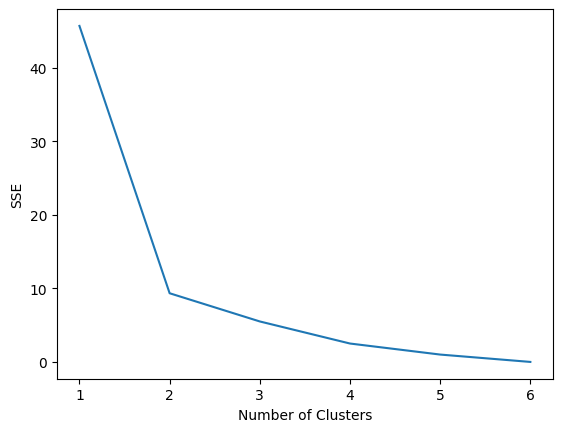

In [520]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## 8.2 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [521]:
import pandas as pd

data = pd.read_csv('/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/inclass/week3/vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


### 8.2.1 Single Link (MIN)

In [522]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
matrix = X.values
Z = hierarchy.linkage(matrix, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
# print(Y.head())
# print(X.head())

0       mammals
1      reptiles
2        fishes
3       mammals
4    amphibians
Name: Class, dtype: object
   Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  Has Legs  \
0             1            1                 0                0         1   
1             0            0                 0                0         0   
2             0            0                 1                0         0   
3             1            1                 1                0         0   
4             0            0                 1                0         1   

   Hibernates  
0           0  
1           1  
2           0  
3           0  
4           1  


### 8.2.2 Complete Link (MAX)

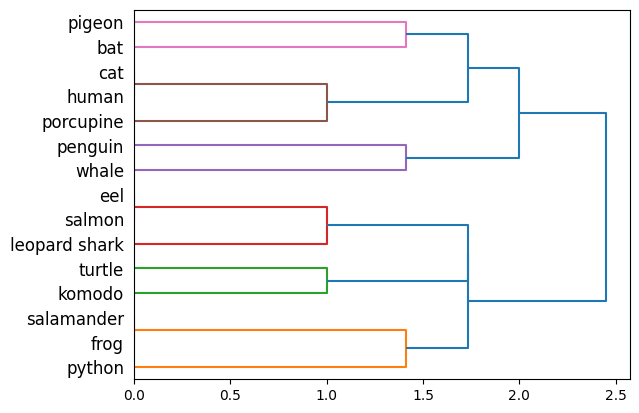

In [523]:
Z = hierarchy.linkage(matrix, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 8.3.3 Group Average

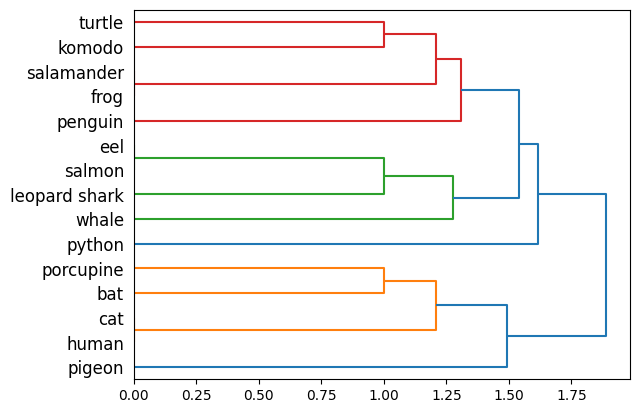

In [524]:
Z = hierarchy.linkage(matrix, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 8.3 Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples).

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

<Axes: xlabel='x', ylabel='y'>

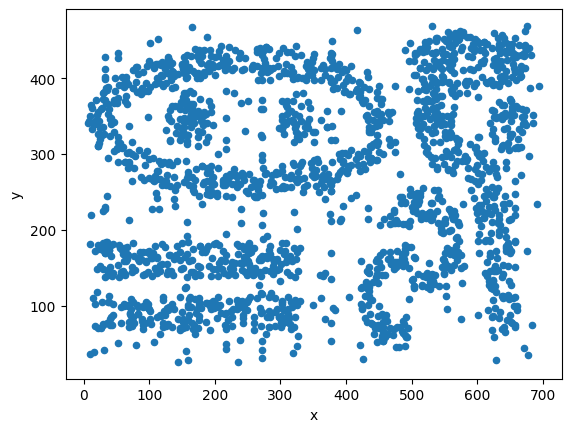

In [525]:
import pandas as pd

data = pd.read_csv('chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

<Axes: xlabel='x', ylabel='y'>

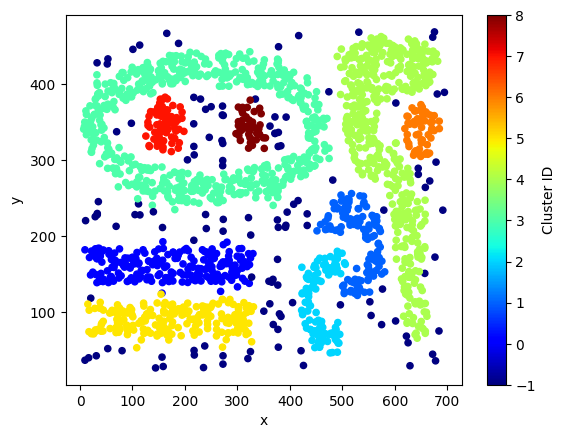

In [526]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

## 8.4 Spectral Clustering

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. Spectral clustering can overcome this limitation by exploiting properties of the similarity graph to overcome such limitations. To illustrate this, consider the following two-dimensional datasets.

<Axes: xlabel='x', ylabel='y'>

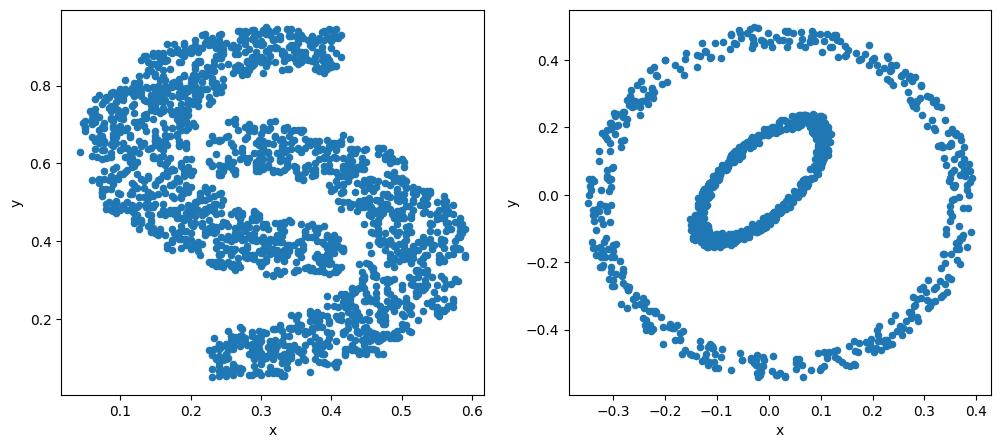

In [585]:
import pandas as pd

data1 = pd.read_csv('2d_data.txt', delimiter=' ', names=['x','y'])
data2 = pd.read_csv('elliptical.txt', delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)
ax1

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'K-means Clustering')

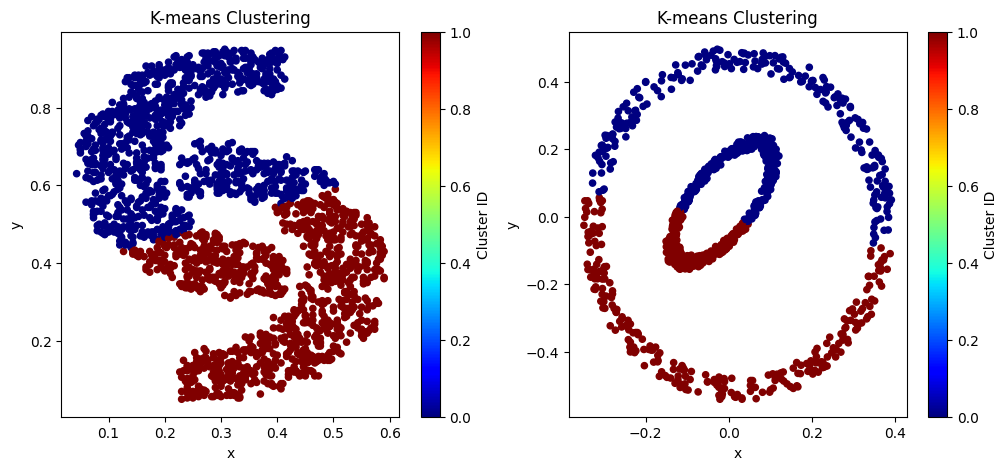

In [528]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

The plots above show the poor performance of k-means clustering. Next, we apply spectral clustering to the datasets. Spectral clustering converts the data into a similarity graph and applies the normalized cut graph partitioning algorithm to generate the clusters. In the example below, we use the Gaussian radial basis function as our affinity (similarity) measure. Users need to tune the kernel parameter (gamma) value in order to obtain the appropriate clusters for the given dataset.

Text(0.5, 1.0, 'Spectral Clustering')

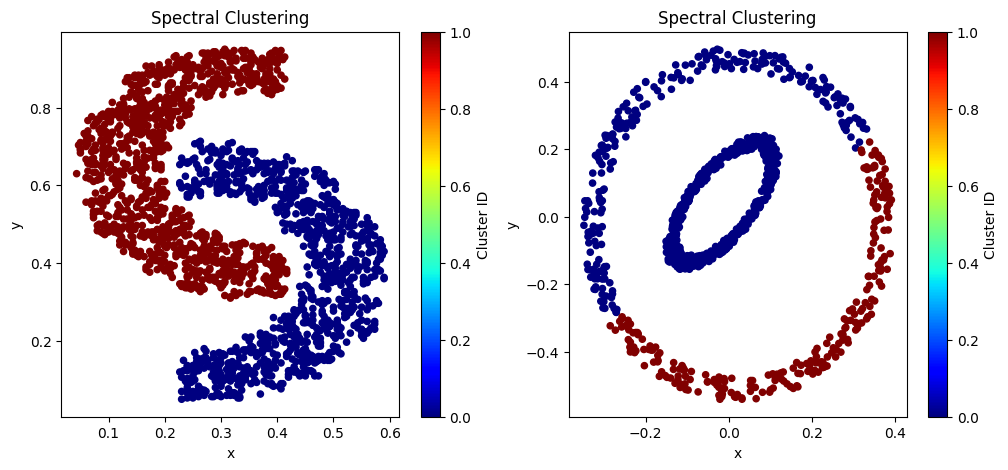

In [529]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=5000)
spectral.fit(data1)
labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=100)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')

## 8.5 Summary

This tutorial illustrates examples of using different Python's implementation of clustering algorithms. Algorithms such as k-means, spectral clustering, and DBScan are designed to create disjoint partitions of the data whereas the single-link, complete-link, and group average algorithms are designed to generate a hierarchy of cluster partitions.

References:
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.

## In-class Clustering Practice ##

Given college-and-university.csv, conduct K-means clustering analysis based on Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS, and Graduation %. Do not use Type in your analysis. Find out the the best K value.

In [530]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

college_uni_data = pd.read_csv('colleges-and-universities.csv')

In [531]:
college_uni_data

,School,Type,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,Amherst,Lib Arts,1315,22,26636.0,85,93
1,Barnard,Lib Arts,1220,53,17653.0,69,80
2,Bates,Lib Arts,1240,36,17554.0,58,88
3,Berkeley,University,1176,37,23665.0,95,68
4,Bowdoin,Lib Arts,1300,24,25703.0,78,90
5,Brown,University,1281,24,24201.0,80,90
6,Bryn Mawr,Lib Arts,1255,56,18847.0,70,84
7,Cal Tech,University,1400,31,102262.0,98,75
8,Carleton,Lib Arts,1300,40,15904.0,75,80
9,Carnegie Mellon,University,1225,64,33607.0,52,77


<Axes: >

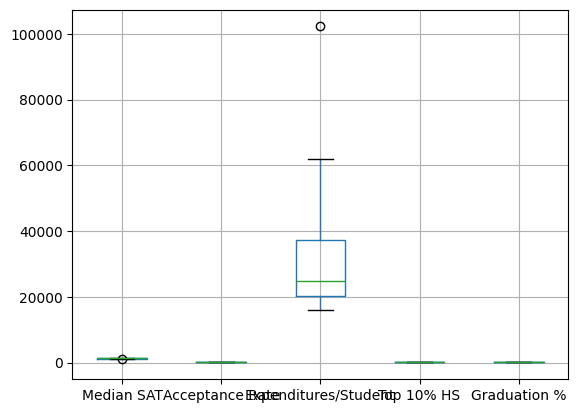

In [532]:
college_uni_data.boxplot()


There seems to be an outlier, for now I didn't have time to remove it but will be interesting to see impact to KMeans

In [533]:
# college_uni_data_r = college_uni_data.drop([7])

In [534]:
# college_uni_data_r.boxplot()

In [535]:
college_uni_data.describe().transpose()
# college_uni_data_r.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Median SAT,49.0,1263.102041,62.676499,1109.0,1225.0,1260.0,1300.0,1400.0
Acceptance Rate,49.0,38.102041,13.371682,17.0,28.0,36.0,48.0,67.0
Expenditures/Student,49.0,30060.326531,15463.308212,15904.0,20179.0,24718.0,37137.0,102262.0
Top 10% HS,49.0,74.204082,13.550799,47.0,65.0,76.0,85.0,98.0
Graduation %,49.0,83.244898,7.448519,61.0,77.0,85.0,89.0,93.0


In [536]:
college_uni_data_notype = college_uni_data.drop(columns=['School', 'Type'])
type_school = college_uni_data[['School','Type']]
# If index=1 was included, it wouldalso drop the 1th row, if index=0 was included it would drop the 0th row, same if 3 or any other int was included

# college_uni_data_notype_r = college_uni_data.drop(columns=['School', 'Type'])
# type_school_r = college_uni_data[['School','Type']]

In [537]:
college_uni_data_notype.head()
# college_uni_data_notype_r.head()

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,1315,22,26636.0,85,93
1,1220,53,17653.0,69,80
2,1240,36,17554.0,58,88
3,1176,37,23665.0,95,68
4,1300,24,25703.0,78,90


Will Normalize the data

<Axes: >

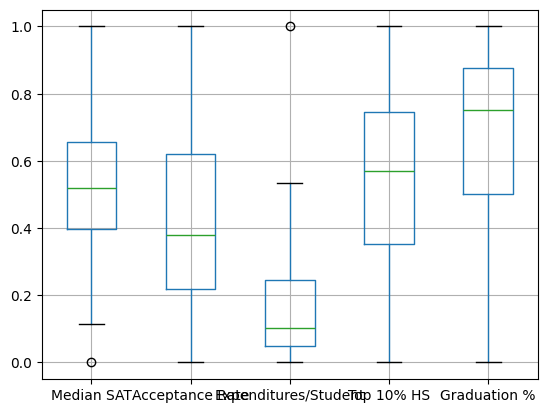

In [538]:
transformer = MinMaxScaler().fit_transform(college_uni_data_notype)
college_uni_data_notype_norm = pd.DataFrame(transformer, columns=college_uni_data_notype.columns)
college_uni_data_notype_norm.boxplot()

# transformer_r = MinMaxScaler().fit_transform(college_uni_data_notype_r)
# college_uni_data_notype_norm_r = pd.DataFrame(transformer_r, columns=college_uni_data_notype_r.columns)
# college_uni_data_notype_norm_r.boxplot()

In [539]:
k_meansI = cluster.KMeans(n_clusters=2, max_iter=100,random_state=1)

# k_meansI_r = cluster.KMeans(n_clusters=2, max_iter=100,random_state=1)

In [540]:
k_meansI.fit(college_uni_data_notype_norm)

# k_meansI_r.fit(college_uni_data_notype_norm_r)

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=2, random_state=1)

In [541]:
labels = k_meansI.labels_

# labels_r = k_meansI_r.labels_

In [542]:
cluster = pd.DataFrame(labels,index=college_uni_data.School, columns=['Cluster ID'])
merged_cluster = cluster.merge(type_school, how='outer', on='School')
merged_cluster.head()

# cluster_r = pd.DataFrame(labels_r,index=college_uni_data_r.School, columns=['Cluster ID'])
# merged_cluster_r = cluster_r.merge(type_school_r, how='outer', on='School')
# merged_cluster_r.head()

,School,Cluster ID,Type
0,Amherst,0,Lib Arts
1,Barnard,1,Lib Arts
2,Bates,1,Lib Arts
3,Berkeley,1,University
4,Bowdoin,0,Lib Arts


In [543]:
# Need to one hot encode the school type
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
school_types = ohe.fit_transform(merged_cluster[['Type']])
school_types.head()

school_pp = pd.concat([merged_cluster, school_types], axis=1)
school_pp.drop(['Type'], axis=1, inplace=True)

In [544]:
school_pp.head()

,School,Cluster ID,Type_Lib Arts,Type_University
0,Amherst,0,1.0,0.0
1,Barnard,1,1.0,0.0
2,Bates,1,1.0,0.0
3,Berkeley,1,0.0,1.0
4,Bowdoin,0,1.0,0.0


In [545]:
school_pp.corr(numeric_only=True)

,Cluster ID,Type_Lib Arts,Type_University
Cluster ID,1.000000,0.182582,-0.182582
Type_Lib Arts,0.182582,1.000000,-1.000000
Type_University,-0.182582,-1.000000,1.000000


The correlation between Cluster ID and type is fairly weak at 0.182 for Liberal Arts and -0.182 for University. Will see if not normalizing gets better clusters

In [546]:
from sklearn import cluster

non_normalized_Kmeans = cluster.KMeans(n_clusters=2, max_iter=100,random_state=1)

In [547]:
non_normalized_Kmeans.fit(college_uni_data_notype)

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=2, random_state=1)

In [548]:
labels_nn = non_normalized_Kmeans.labels_

In [549]:
cluster_nn = pd.DataFrame(labels_nn,index=college_uni_data.School, columns=['Cluster ID'])
merged_cluster_nn = cluster_nn.merge(type_school, how='outer', on='School')
merged_cluster_nn.head()

,School,Cluster ID,Type
0,Amherst,1,Lib Arts
1,Barnard,1,Lib Arts
2,Bates,1,Lib Arts
3,Berkeley,1,University
4,Bowdoin,1,Lib Arts


In [550]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
school_types_nn = ohe.fit_transform(merged_cluster_nn[['Type']])
school_types_nn.head()

school_pp_nn = pd.concat([merged_cluster_nn, school_types], axis=1)
school_pp_nn.drop(['Type'], axis=1, inplace=True)

school_pp_nn.corr(numeric_only=True)

,Cluster ID,Type_Lib Arts,Type_University
Cluster ID,1.000000,0.613317,-0.613317
Type_Lib Arts,0.613317,1.000000,-1.000000
Type_University,-0.613317,-1.000000,1.000000


In [551]:
centroids = k_meansI.cluster_centers_
pd.DataFrame(centroids,columns=college_uni_data_notype_norm.columns)

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,0.695720,0.198182,0.241115,0.710339,0.856534
1,0.394171,0.604444,0.101031,0.389252,0.563657


/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/rave

Text(0, 0.5, 'SSE')

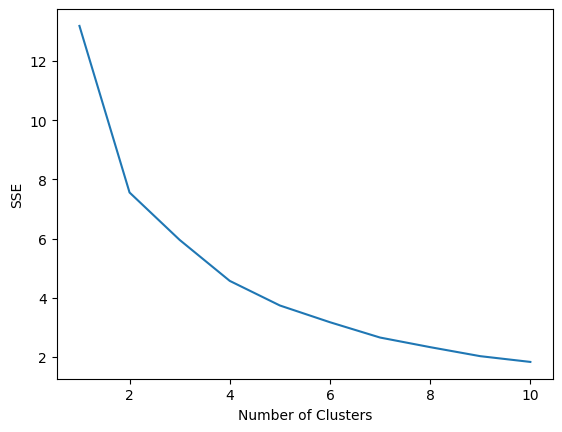

In [552]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8,9,10]
SSE = []
for k in numClusters:
    k_meansK = KMeans(n_clusters=k)
    k_meansK.fit(college_uni_data_notype_norm)
    SSE.append(k_meansK.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The best K is 2, this is the knee of the SSE.

2. Given college-and-university.csv, conduct Hierarchical clustering analysis based on Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS, and Graduation %. Do not use Type and School in your analysis.

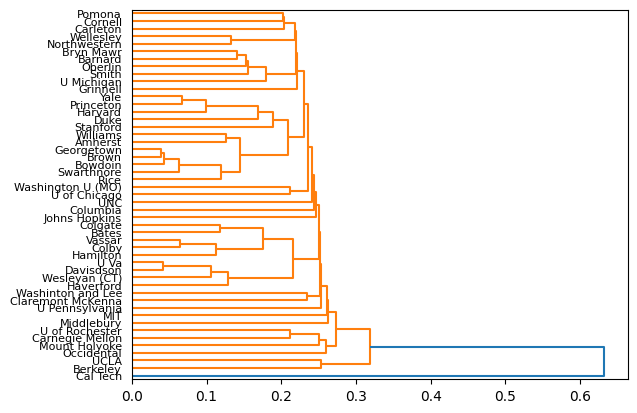

In [565]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = college_uni_data.School
Y1 = college_uni_data_notype_norm['Median SAT']
X1 = college_uni_data_notype_norm.drop(['Median SAT'], axis=1)
matrix1 = X1.values
Z1 = hierarchy.linkage(matrix1, 'single')
dn1 = hierarchy.dendrogram(Z1,labels=names.tolist(),orientation='right')

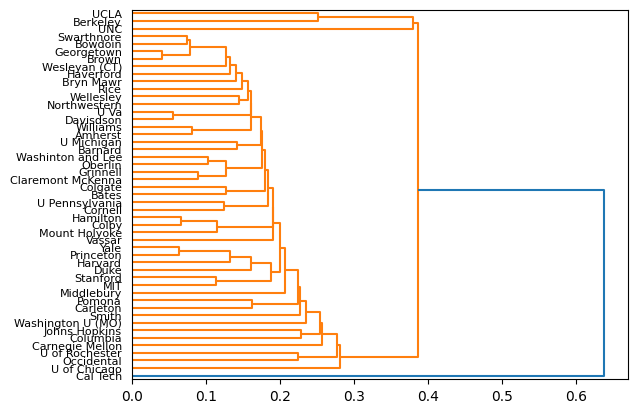

In [566]:
names = college_uni_data.School
Y2 = college_uni_data_notype_norm['Acceptance Rate']
X2 = college_uni_data_notype_norm.drop(['Acceptance Rate'], axis=1)
matrix2 = X2.values
Z2 = hierarchy.linkage(matrix2, 'single')
dn2 = hierarchy.dendrogram(Z2,labels=names.tolist(),orientation='right')

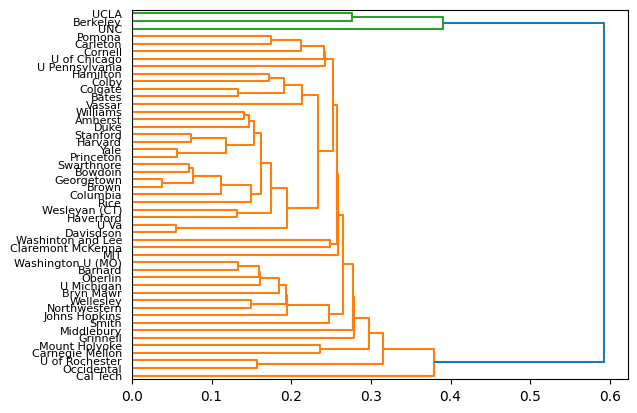

In [567]:
names = college_uni_data.School
Y3 = college_uni_data_notype_norm['Expenditures/Student']
X3 = college_uni_data_notype_norm.drop(['Expenditures/Student'], axis=1)
matrix3 = X3.values
Z3 = hierarchy.linkage(matrix3, 'single')
dn3 = hierarchy.dendrogram(Z3,labels=names.tolist(),orientation='right')

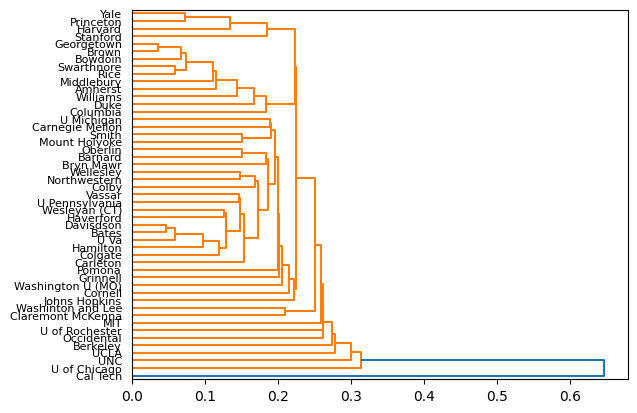

In [568]:
names = college_uni_data.School
Y4 = college_uni_data_notype_norm['Top 10% HS']
X4 = college_uni_data_notype_norm.drop(['Top 10% HS'], axis=1)
matrix4 = X4.values
Z4 = hierarchy.linkage(matrix4, 'single')
dn4 = hierarchy.dendrogram(Z4,labels=names.tolist(),orientation='right')

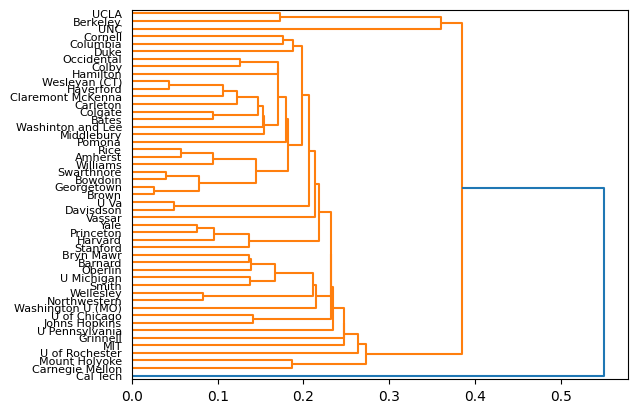

In [569]:
names = college_uni_data.School
Y5 = college_uni_data_notype_norm['Graduation %']
X5 = college_uni_data_notype_norm.drop(['Graduation %'], axis=1)
matrix5 = X5.values
Z5 = hierarchy.linkage(matrix5, 'single')
dn4 = hierarchy.dendrogram(Z5,labels=names.tolist(),orientation='right',)


Max

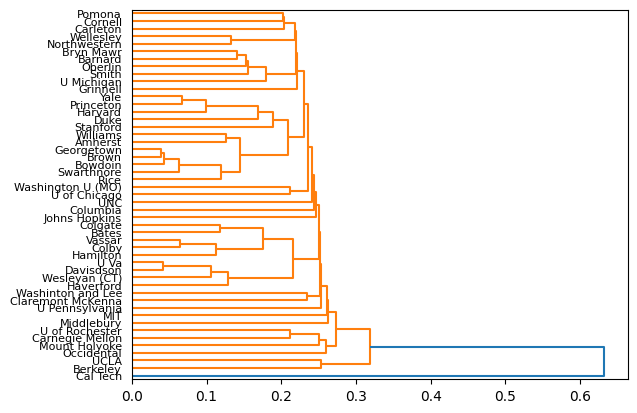

In [570]:
Z11 = hierarchy.linkage(matrix1, 'complete')
dn11 = hierarchy.dendrogram(Z1,labels=names.tolist(),orientation='right')

Average

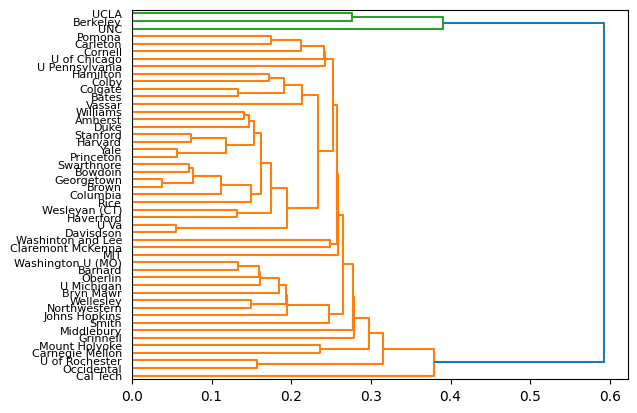

In [577]:
Z12 = hierarchy.linkage(matrix1, 'average')
dn12 = hierarchy.dendrogram(Z3,labels=names.tolist(),orientation='right')

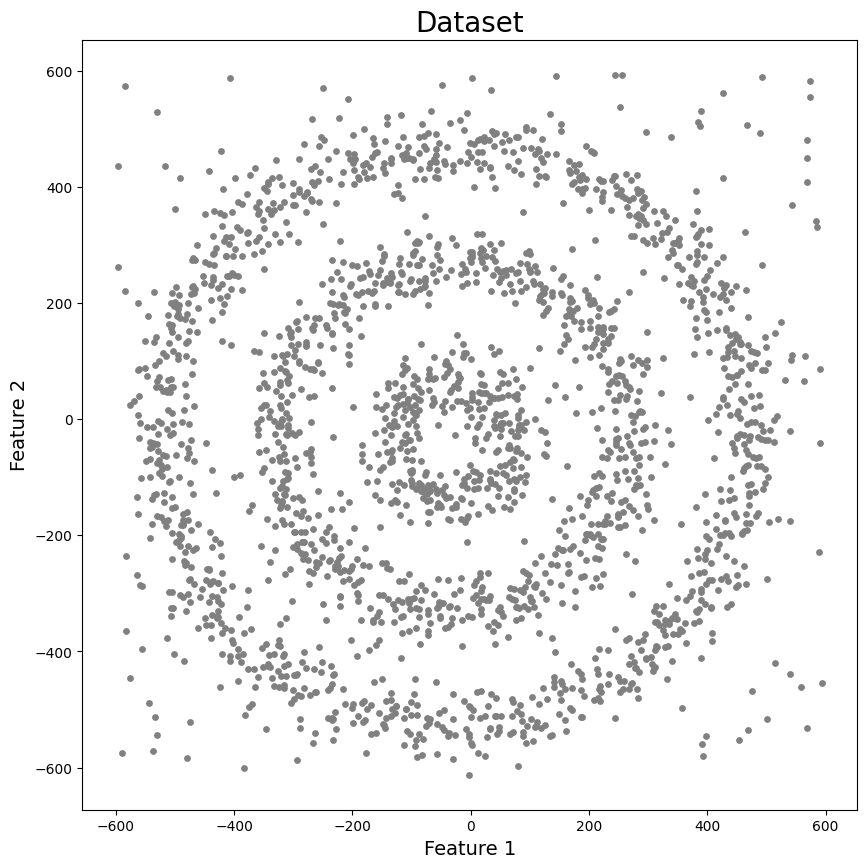

In [587]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=pd.concat([df, pd.DataFrame(PointsInCircum(300,700))], axis=0)
df=pd.concat([df, pd.DataFrame(PointsInCircum(100,300))], axis=0)

# Adding noise to the dataset
noise = pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])
df=pd.concat([df, noise], axis=0)

plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

3. Using the data in df above, conduct K-means and density-based clustering. Provide visulization for the clustering results. Use eps=30 and min_samples=6 for DBScan.

In [610]:
from sklearn import cluster

# I can easily see there are 3 cluster, want to see what the algorithm does
k_means_3 = cluster.KMeans(n_clusters=3, max_iter=100,random_state=1)
k_means_3.fit(df)
labels_3 = k_means_3.labels_
df.head()

/home/raven/Documents/CS/CS522_DM/github/CS522_DataMining/datamining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


<Axes: xlabel='0', ylabel='1'>

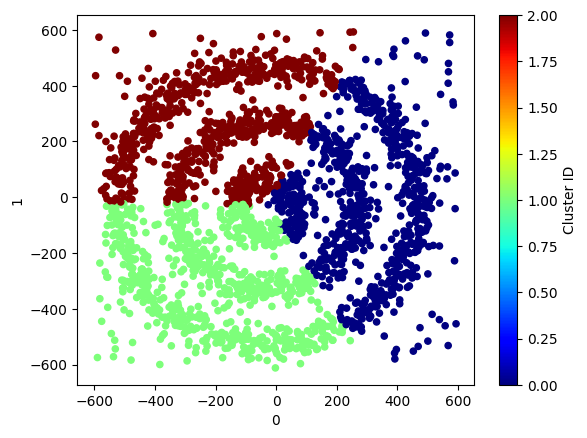

In [611]:
labels3 = pd.DataFrame(labels_3,columns=['Cluster ID'])
result3 = pd.concat([df,labels3.set_index(df.index)], axis=1)
result3.plot.scatter(x=0,y=1,c='Cluster ID',colormap='jet')

The KMeans doesn't perform well with this dataset.

In [617]:
from sklearn.cluster import DBSCAN

clustering_db = DBSCAN(eps=30, min_samples=6).fit(df)
cluster_db = clustering_db.labels_

<Axes: xlabel='0', ylabel='1'>

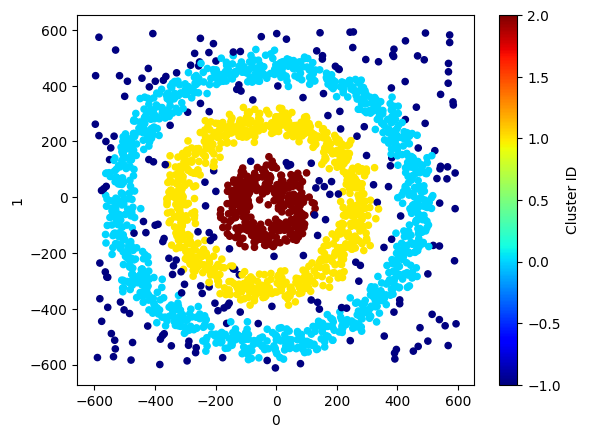

In [619]:
labels = pd.DataFrame(cluster_db,columns=['Cluster ID'])
result = pd.concat([df,labels.set_index(df.index)], axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

You can see DBSCAN successfully made three clusters.  Below is some experimentation with the eps

<Axes: xlabel='0', ylabel='1'>

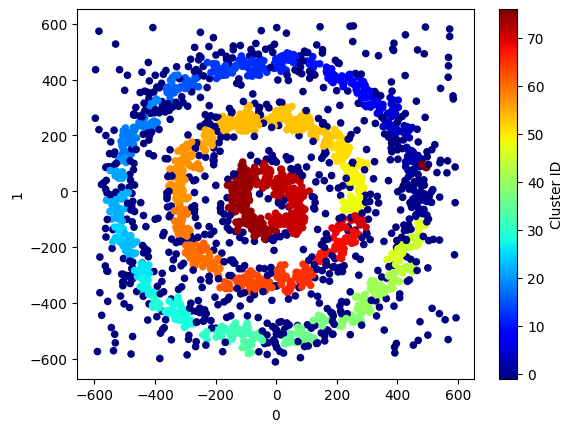

In [631]:
from sklearn.cluster import DBSCAN

clustering_db1 = DBSCAN(eps=20, min_samples=6).fit(df)
cluster_db1 = clustering_db1.labels_
labels1 = pd.DataFrame(cluster_db1,columns=['Cluster ID'])
result1 = pd.concat([df,labels1.set_index(df.index)], axis=1)
result1.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

In [634]:
len(set(cluster_db1))

78

With a eps of 20, there are 78 differnent clusters